In [1]:
import os, glob
import thinkdsp
import thinkplot
import pickle
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import signalprocessing as sigp
import soundmfccparams as smfccp

from graphviz import Source
from scipy.io.wavfile import write
from IPython.display import SVG
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

In [2]:
# Path for signal/noise packs
signalPath = r"/home/vaclav/Desktop/Diploma/Clean Signals/ETHALON_SIGNAL"
noisePath = r"/home/vaclav/Desktop/Diploma/Clean Signals/ETHALON_NOISE"

In [3]:
## This is signal data extracting
signalMaxAmp = sigp.calculate_mean_amplitude_list(signalPath)
#signalMaxAmpSplit = sigp.split_calculate_mean_amplitude_list(signalPath)
signalSco = sigp.calculate_SCO_amplitude_list(signalPath)
#signalCrestFactor = sigp.calculate_CRFACT_list(signalPath)
#signalCentroid = sigp.calculate_CENTROID_list(signalPath)
#signalSpread = sigp.calculate_SPREAD_list(signalPath)
#signalFlatness = sigp.calculate_FLATNESS_list(signalPath)
# Extracting MFCC params (in Dataframe)
#signalMfcc = smfccp.compute_mfcc(signalPath)
#signalMfccDelta = smfccp.compute_mfcc_delta(signalPath)

## This is noise data extracting
noiseMaxAmp = sigp.calculate_mean_amplitude_list(noisePath)
#noiseMaxAmpSplit = sigp.split_calculate_mean_amplitude_list(noisePath)
noiseSco = sigp.calculate_SCO_amplitude_list(noisePath)
#noiseCrestFactor = sigp.calculate_CRFACT_list(noisePath)
#noiseCentroid = sigp.calculate_CENTROID_list(noisePath)
#noiseSpread = sigp.calculate_SPREAD_list(noisePath)
#noiseFlatness = sigp.calculate_FLATNESS_list(noisePath)
# Extracting MFCC params (in Dataframe)
#noiseMfcc = smfccp.compute_mfcc(noisePath)
#noiseMfccDelta = smfccp.compute_mfcc_delta(signalPath)

In [4]:
# Signal splitted amps
#sigLst1 = [item[0] for item in signalMaxAmpSplit]
#sigLst2 = [item[1] for item in signalMaxAmpSplit]
#sigLst3 = [item[2] for item in signalMaxAmpSplit]
#sigLst4 = [item[3] for item in signalMaxAmpSplit]

# Noise splitted amps
#noiseLst1 = [item[0] for item in noiseMaxAmpSplit]
#noiseLst2 = [item[1] for item in noiseMaxAmpSplit]
#noiseLst3 = [item[2] for item in noiseMaxAmpSplit]
#noiseLst4 = [item[3] for item in noiseMaxAmpSplit]

In [5]:
#signalDataFrame = {'Total MaxAmp': signalMaxAmp, 'Split MaxAmp 1': sigLst1, 'Split MaxAmp 2': sigLst2, 'Split MaxAmp 3': sigLst3, 'Split MaxAmp 4': sigLst4, 'SCO': signalSco, 'Crest Factor': signalCrestFactor, 'Centroid': signalCentroid, 'Spread': signalSpread, 'Flatness': signalFlatness}
signalDataFrame = {'Total MaxAmp': signalMaxAmp, 'SCO': signalSco}
signalDataFrame = pd.DataFrame(data=signalDataFrame)
#signalDataFrame = pd.concat([signalDataFrame,signalMfcc], axis=1)
signalDataFrame.head()

,Total MaxAmp,SCO
0,150491.537060,4768.996440
1,188712.414558,4349.457934
2,84961.096049,5091.114845
3,138158.188052,4819.529596
4,120590.941329,3039.291506


In [6]:
#noiseDataFrame = {'Total MaxAmp': noiseMaxAmp, 'Split MaxAmp 1': noiseLst1, 'Split MaxAmp 2': noiseLst2, 'Split MaxAmp 3': noiseLst3, 'Split MaxAmp 4': noiseLst4, 'SCO': noiseSco, 'Crest Factor': noiseCrestFactor, 'Centroid': noiseCentroid, 'Spread': noiseSpread, 'Flatness': noiseFlatness}
noiseDataFrame = {'Total MaxAmp': noiseMaxAmp, 'SCO': noiseSco}
noiseDataFrame = pd.DataFrame(data=noiseDataFrame)
#noiseDataFrame = pd.concat([noiseDataFrame,noiseMfcc], axis=1)
noiseDataFrame.head()

,Total MaxAmp,SCO
0,197646.902974,2803.844287
1,129685.197740,2101.851074
2,180220.361382,2384.718603
3,210974.441494,2691.155515
4,74995.918594,1442.563812


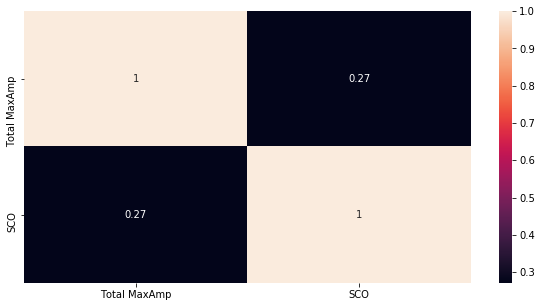

In [7]:
signalCorrMatrix = signalDataFrame.corr()
sn.heatmap(signalCorrMatrix, annot=True)

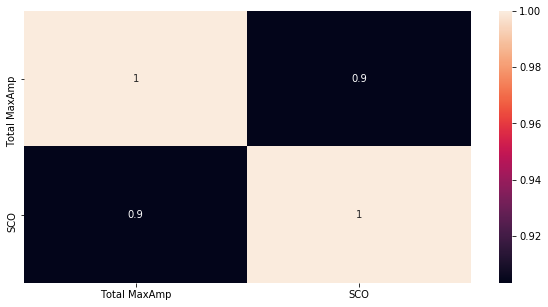

In [8]:
noiseCorrMatrix = noiseDataFrame.corr()
sn.heatmap(noiseCorrMatrix, annot=True)

In [9]:
# Using PCA to reduce components
#signalDataFrame = smfccp.pca_dataframe(signalDataFrame, 15)
#noiseDataFrame = smfccp.pca_dataframe(noiseDataFrame, 15)

In [10]:
#rng = range(0, int((len(list(signalDataFrame))-1)/2)+1)

#new_cols = ['type_' + str(i) for i in rng] + ['expt_' + str(i) for i in rng]

# ensure the length of the new columns list is equal to the length of df's columns
#signalDataFrame.columns = new_cols[:len(list(signalDataFrame))]
#signalDataFrame

In [11]:
#rng = range(0, int((len(list(noiseDataFrame))-1)/2)+1)

#new_cols = ['type_' + str(i) for i in rng] + ['expt_' + str(i) for i in rng]

# ensure the length of the new columns list is equal to the length of df's columns
#noiseDataFrame.columns = new_cols[:len(list(noiseDataFrame))]
#noiseDataFrame

In [12]:
# 1-es pack for final Dataframe (signals)
ones = {'Flag': np.ones(len(signalMaxAmp))}
onesFlag = pd.DataFrame(data=ones)

# 0-es pack for final Dataframe (noises)
zeroes = {'Flag': np.zeros(len(noiseMaxAmp))}
zeroesFlag = pd.DataFrame(data=zeroes)

# Adding "Flag" fields
signalDataFrame = signalDataFrame.assign(Flag=onesFlag['Flag'])
noiseDataFrame = noiseDataFrame.assign(Flag=zeroesFlag['Flag'])

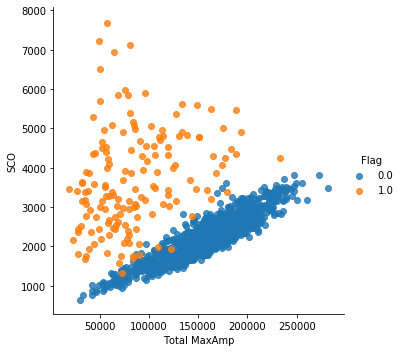

In [13]:
# Uniting signals & noises data in one Dataframe
learningDataframe = pd.merge(signalDataFrame, noiseDataFrame, how='outer')

# Visualizing the data (1 - signal, 0 - noise)
sn.lmplot('Total MaxAmp', 'SCO', data=learningDataframe, hue="Flag", fit_reg=False)
#sn.lmplot('type_0', 'type_2', data=learningDataframe, hue="Flag", fit_reg=False)

In [14]:
############################################################################## TRAIN ##############################################################################

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.4s finished


Average number of nodes 40
Average maximum depth 8
Recall Baseline: 1.0 Test: 1.0 Train: 0.99
Precision Baseline: 0.1 Test: 0.86 Train: 1.0
Roc Baseline: 0.5 Test: 0.99 Train: 1.0
Confusion matrix, without normalization
[[51  1]
 [ 0  6]]


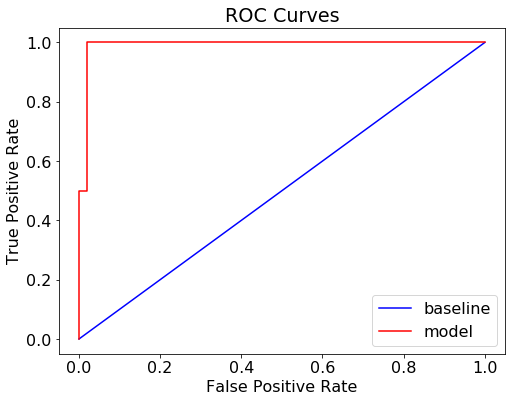

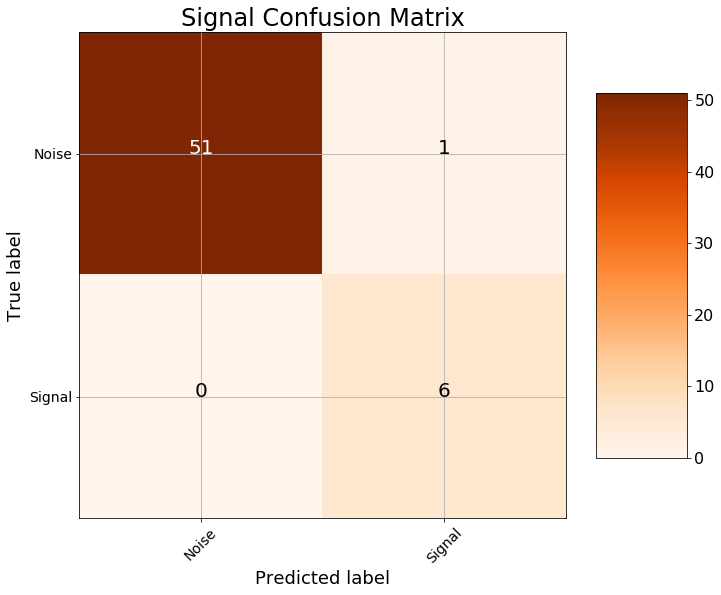

In [15]:
# 15% examples in test data ['Total MaxAmp', 'Split MaxAmp 1', 'Split MaxAmp 2', 'Split MaxAmp 3', 'Split MaxAmp 4', 'SCO', 'Crest Factor', 'Centroid', 'Spread', 'Flatness']
train, test, train_labels, test_labels = train_test_split(learningDataframe.drop(columns=['Flag']), learningDataframe['Flag'], test_size=0.05, random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 100).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = 42)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=42)

# Fit 
rs.fit(train, train_labels)

# Finding best
best_model = rs.best_estimator_
train_rf_predictions = best_model.predict(train)
train_rf_probs = best_model.predict_proba(train)[:, 1]
rf_predictions = best_model.predict(test)
rf_probs = best_model.predict_proba(test)[:, 1]
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)

# Printing result info and graphics
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

sigp.evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs, test_labels, train_labels)
cm = sigp.confusion_matrix(test_labels, rf_predictions)
sigp.plot_confusion_matrix(cm, classes = ['Noise', 'Signal'],
                      title = 'Signal Confusion Matrix')

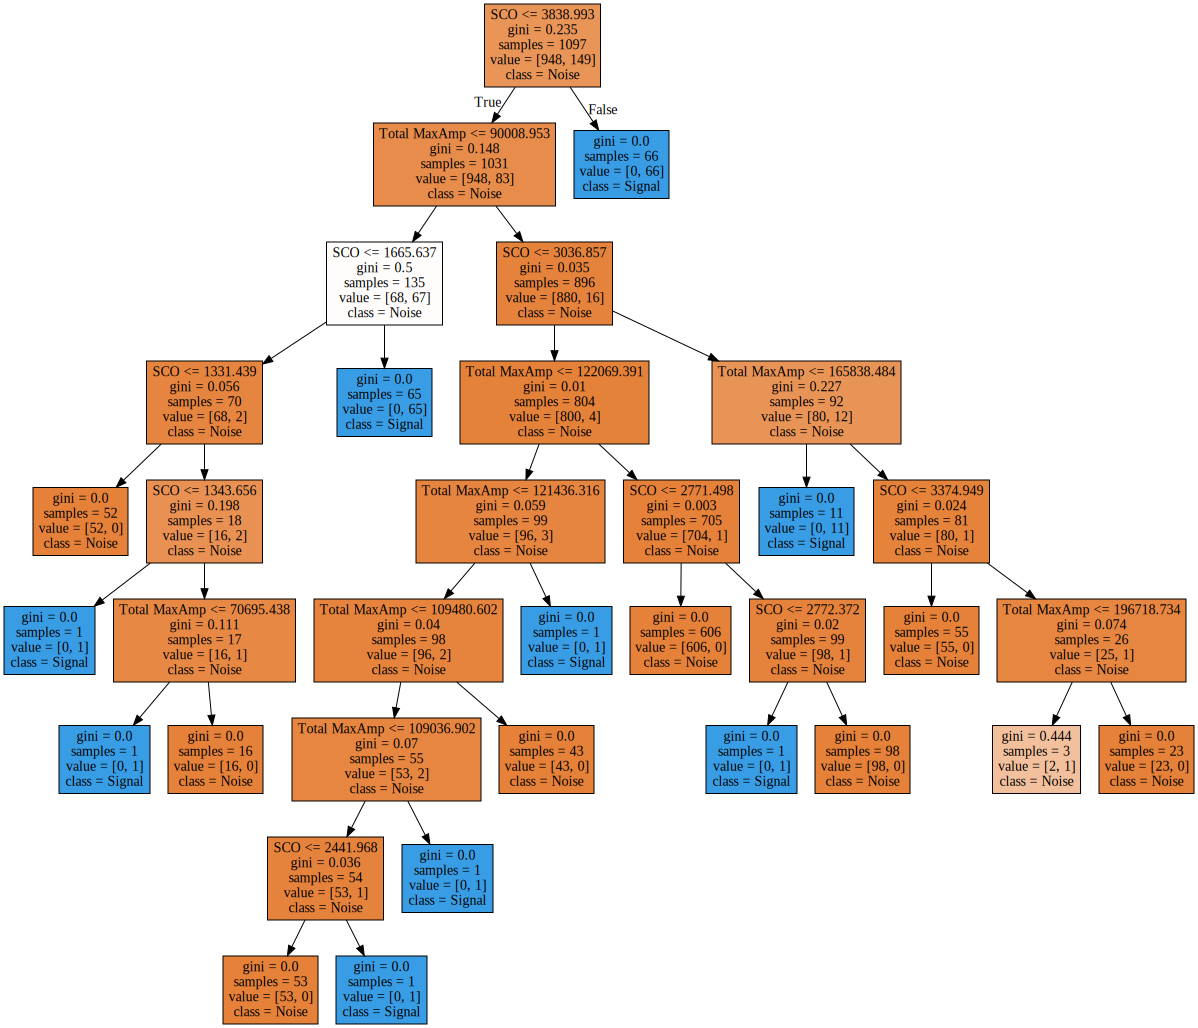

'tree.dot.png'

In [16]:
# Graphviz trees visualization (.estimators_[0] - first tree)
feature_names=learningDataframe.drop(columns=['Flag']).columns
class_names=['Noise', 'Signal']

graph = Source(export_graphviz(best_model.estimators_[0],
                feature_names=feature_names,
                class_names=class_names,
                filled=True,
                rounded=False))
display(SVG(graph.pipe(format='svg')))
graph.render(filename='tree.dot', format='png')

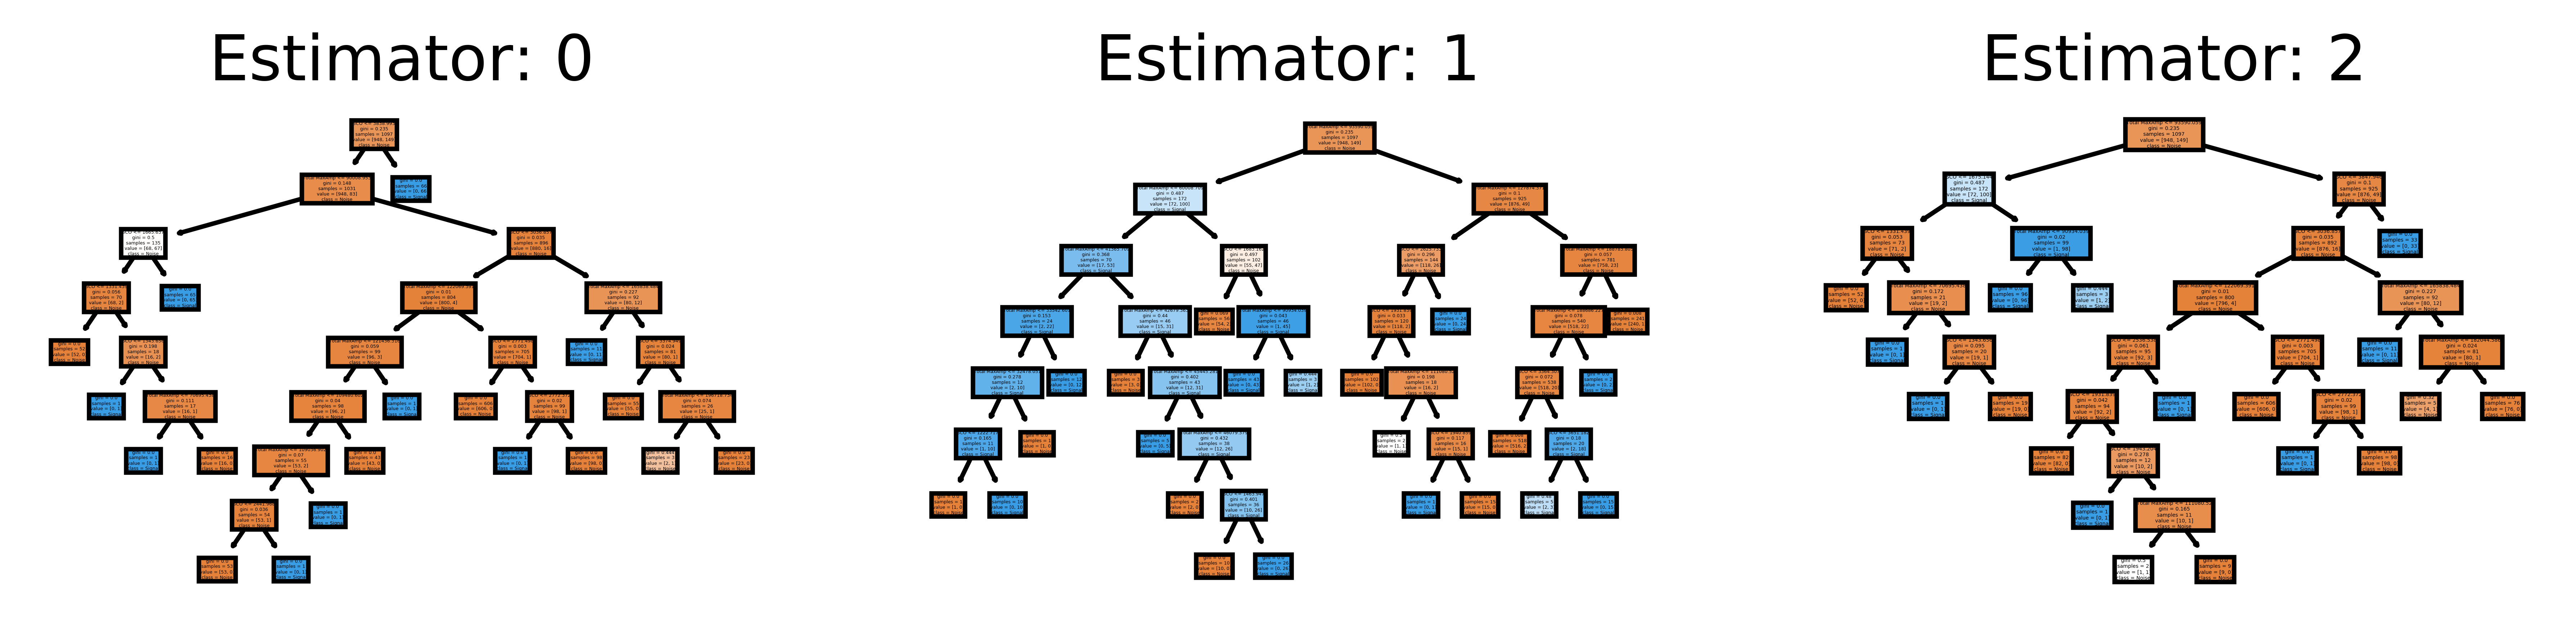

In [17]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=900)
for index in range(0, 3):
    tree.plot_tree(best_model.estimators_[index],
                   feature_names = feature_names, 
                   class_names=class_names,
                   filled = True,
                   ax = axes[index]);
    axes[index].set_title('Estimator: ' + str(index), fontsize = 14)
fig.savefig('rf_3trees.png')

In [18]:
############################################################################## TEST ##############################################################################

In [19]:
classifierFilename = 'classificator.sav'
pickle.dump(best_model, open(classifierFilename, 'wb'))

In [20]:
# Path for packs
psignalPath = r"/home/vaclav/Desktop/Diploma/Dirty Signals/Test/Test02/"

In [21]:
# Extracting the dataframes (data characteristics)
psignalDataFrame = sigp.extract_data(psignalPath)

In [22]:
# Predicting the classification
predictedData = best_model.predict(psignalDataFrame)
predictedsignalDataFrame = psignalDataFrame.assign(Flag=predictedData)

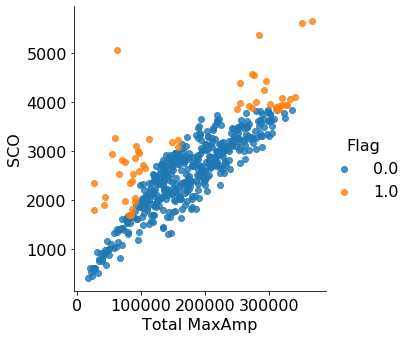

In [23]:
sn.lmplot('Total MaxAmp', 'SCO', data=predictedsignalDataFrame, hue="Flag", fit_reg=False)

In [24]:
# Loading wav files for spectrogramms
audiolist = sigp.load_list_of_wav(psignalPath)
temp = audiolist
ppredictedsignalDataFrame = predictedsignalDataFrame.loc[predictedsignalDataFrame['Flag'] == 1]
ppredictedsignalDataFrame.head()

,Total MaxAmp,SCO,Flag
6,309957.940024,3904.096865,1.0
22,105782.554709,2665.258478,1.0
43,253901.176198,3981.864581,1.0
45,95977.977244,3015.665804,1.0
61,96614.384431,2588.973031,1.0


No handles with labels found to put in legend.


Signal amount is  54
Signal № 43
Time resolution (s) 0.028444444444444446
Frequency resolution (Hz) 35.15625


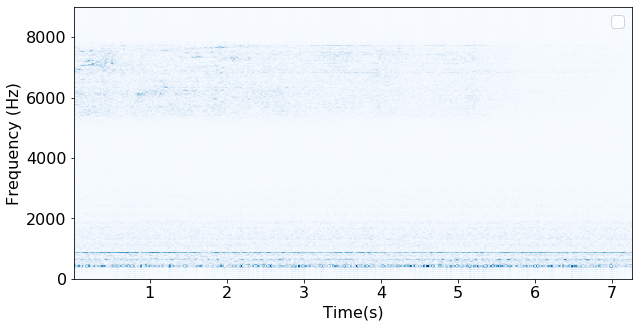

No handles with labels found to put in legend.


Signal № 45
Time resolution (s) 0.028444444444444446
Frequency resolution (Hz) 35.15625


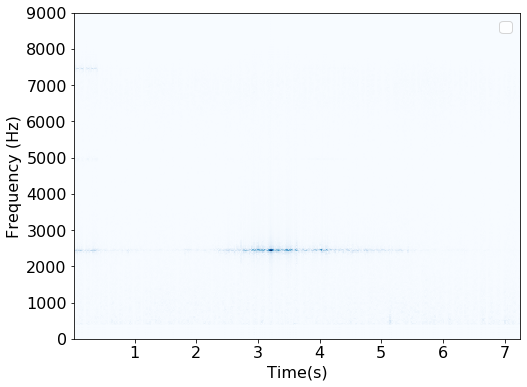

<Figure size 576x432 with 0 Axes>

In [33]:
sigp.plot_all_spectrogramms(audiolist, predictedsignalDataFrame, 512, 2, 4, 1)

In [34]:
audiolist[45].make_audio()

In [35]:
sigp.copy_filtered_signal(psignalPath, 45)